# Generating HTML skeleton based skeleton image

In this example, based on the sample webpage skeleton from a text file, we will instruct the model to recreate this structure in HTML. Additionally we ask chat for using bootstrap.

## Imports and global objects definition

In [1]:
from openai import OpenAI
from gpt4_vision_playgrund.config import get_openai_key
from IPython.display import Image, Markdown, HTML
from gpt4_vision_playgrund.config import get_git_root
from gpt4_vision_playgrund.html_utils import get_html_from_markdown_single_code
from gpt4_vision_playgrund.vision_utils import system_message, user_message_with_image

In [2]:
DATA_DIRECTORY = get_git_root() / "data"
HTML_SKELETON_IMAGE_PATH = DATA_DIRECTORY / 'html_page.png'
OPENAI_CLIENT = OpenAI(api_key=get_openai_key())

## Input image preview

This is the simple skeleton of html page – it contains:
  - header (with logo, page name, and main menu)
  - table of content on left site
  - main content on right

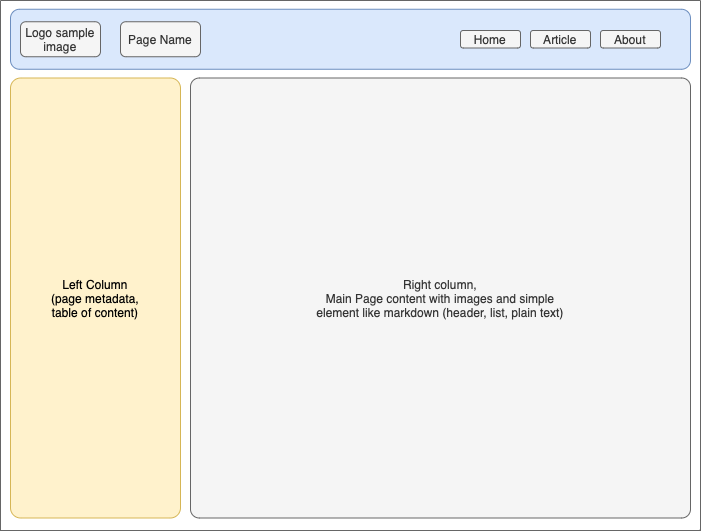

In [3]:
Image(filename=HTML_SKELETON_IMAGE_PATH)

## Call to OpenAI

In [4]:
response = OPENAI_CLIENT.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        system_message(
            content="You are html code creator. Please write the HTML code as output."
        ),
        user_message_with_image(
            content="Images should replaced by rectangles with contrast background. "
                    "Please add some sample content in main content page (left column) and page table of content (left column). "
                    "Please use bootstrap styles and create pretty looks page, use bootstrap components.",
            image_file=HTML_SKELETON_IMAGE_PATH
        )
    ],
    max_tokens=4096  # max size
)

In [5]:
response_message_content = response.choices[0].message.content

## Response Preview

In [6]:
Markdown(response_message_content)

Here's a simple HTML structure using Bootstrap to create a layout similar to the one in the image. This includes a navigation bar, a page header, two main content columns (left for the table of contents and right for the main content), and placeholders for images:

```html
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sample Page</title>
    <!-- Link to Bootstrap CSS -->
    <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" rel="stylesheet">
    <style>
        .image-placeholder {
            background-color: #ddd;
            width: 100%;
            height: 150px;
            text-align: center;
            line-height: 150px;
            color: #666;
            margin-bottom: 15px;
        }
    </style>
</head>

<body>
    <nav class="navbar navbar-expand-lg navbar-light bg-light">
        <a class="navbar-brand" href="#">
            <div class="image-placeholder">Logo sample image</div>
        </a>
        <span class="navbar-text">Page Name</span>
        <div class="collapse navbar-collapse" id="navbarNavAltMarkup">
            <div class="navbar-nav ml-auto">
                <a class="nav-item nav-link active" href="#">Home</a>
                <a class="nav-item nav-link" href="#">Article</a>
                <a class="nav-item nav-link" href="#">About</a>
            </div>
        </div>
    </nav>

    <div class="container mt-3">
        <div class="row">
            <div class="col-md-4">
                <div class="p-3 bg-warning">
                    <h5>Table of Contents</h5>
                    <ul class="nav flex-column">
                        <li class="nav-item">
                            <a class="nav-link active" href="#">Introduction</a>
                        </li>
                        <li class="nav-item">
                            <a class="nav-link" href="#">Chapter 1</a>
                        </li>
                        <li class="nav-item">
                            <a class="nav-link" href="#">Chapter 2</a>
                        </li>
                        <li class="nav-item">
                            <a class="nav-link" href="#">Conclusion</a>
                        </li>
                    </ul>
                </div>
            </div>
            <div class="col-md-8">
                <h2>Main Content</h2>
                <div class="image-placeholder">Main image placeholder</div>
                <p>Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi sed velit vel lectus vestibulum mollis. Vivamus maximus nec nulla at molestie.</p>
                <h3>Subheading</h3>
                <p>Curabitur lobortis quis ipsum id faucibus. Aliquam tempus elementum massa nec ornare.</p>
                <ul>
                    <li>Point one</li>
                    <li>Point two</li>
                    <li>Point three</li>
                </ul>
                <p>Etiam in dui commodo, aliquet nibh ut, placerat enim. Fusce non gravida nisi.</p>
            </div>
        </div>
    </div>

    <!-- Link to Bootstrap JS and dependencies -->
    <script src="https://code.jquery.com/jquery-3.5.1.slim.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.9.9/dist/umd/popper.min.js"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>
</body>

</html>
```

This code uses Bootstrap 4 and contains some custom inline CSS for the image placeholders to replace actual images with rectangles, as per the requirement. You would need an internet connection to load Bootstrap CSS and JavaScript files from their CDNs to ensure proper styling and functionality. The `.image-placeholder` class creates a rectangle with a contrast background. The content is organized using Bootstrap's grid system and components, including a navigation bar and list group for the table of contents.

## Show rendered HTML

In [7]:
HTML(get_html_from_markdown_single_code(response_message_content))

## Conclusion

As you can see, the vision model `gpt-4-vision-preview` from OpenAI works quite satisfactorily. It understood well how the webpage should be created. The assumption about using the Bootstrap library has been met. The page even has interactive elements – when you hover over a link, it gets highlighted. Of course, the look itself isn't beautiful and doesn't replicate the template page 1:1, but it's evident that the model grasped the overall layout of the page. Additionally, it adapted to the instruction to create exemplary content as it was requested in the prompt. This is the first release of such a model – undoubtedly, future versions will be even better.